In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 26.3 MB/s 
     |████████████████████████████████| 4.7 MB 57.9 MB/s 
     |████████████████████████████████| 1.3 MB 56.6 MB/s 
     |████████████████████████████████| 365 kB 74.6 MB/s 
     |████████████████████████████████| 115 kB 63.9 MB/s 
     |████████████████████████████████| 212 kB 56.4 MB/s 
     |████████████████████████████████| 120 kB 56.1 MB/s 
     |████████████████████████████████| 127 kB 24.4 MB/s 
     |████████████████████████████████| 6.6 MB 33.1 MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *

# Computer vision
## Image recognition

In [3]:
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.171979,0.012386,0.004736,00:59


epoch,train_loss,valid_loss,error_rate,time
0,0.053221,0.018869,0.005413,00:56


In [6]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Is this a cat?: True.
Probability it's a cat: 0.901007


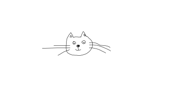

In [11]:
img = PILImage.create(uploader.data[-1])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
img.to_thumb(192)

# Try it out
Try out a few images. Make sure to try a cat, a dog, and something that is neither.

Can you find an image of a cat that the model gets wrong?

Write down at least one observation you have:
* It is mid: basically checks features so a drawing of cat eats and whiskers = yes


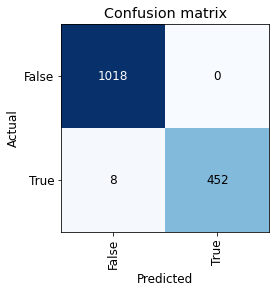

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Analyze
What does each cell of the confusion matrix above mean?
* TODO

Why would it be helpful to look at this confusion matrix instead of just the accuracy/error rate?
* TODO


In [ ]:
interp.plot_top_losses(10)

# Analyze
* Looking at the examples the model got wrong, can you think of any reason(s) it might be getting them wrong?
  - Feature identification rather than realism

# Tabular data

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

In [ ]:
learn.show_results(max_n=5)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## Dataset
Go [here](https://archive.ics.uci.edu/ml/datasets/Adult) to read a bit about the original (less processed) dataset.



# Collaborative filtering (recommendation)

In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

In [ ]:
learn.show_results()

## Dataset
* [MovieLens Dataset](https://dl.acm.org/doi/10.1145/2827872)

# Vocab
* model: TODO
* architecture: TODO
* training: TODO
* fitting: TODO
* prediction: TODO
* inference: TODO
* testing: TODO
* training data: TODO
* validation data: TODO

# Big ideas
* What do you need to make machine learning possible?
  - TODO
  - TODO
  - TODO
* What are some reasons that we should be careful when using machine learning in a way that affects real human beings?
  - TODO